# Notebook 1

Basic data analysis for the Great Barrier Reef (AUS)

The goal for the reproducability challenge is to :
- import the data and functions from other sources (running the script without errors)
- Successfully showing relevant plots
- Understand the basic data analysis 

In [36]:
# Import useful packages
import pyproj
import pandas as pd
import geopandas as gpd
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
import rtree
import pygeos
import os, json
import geopandas as gpd
from ipywidgets import widgets
from ipyleaflet import Map, GeoData, basemaps, LayersControl, ScaleControl, FullScreenControl, WidgetControl
from ipywidgets import widgets, IntSlider, jslink
import numpy as np

import sys
sys.path.insert(0, os.path.abspath(''))

import practical_functions as pf
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Load image from local storage
from IPython.display import Image

from ipyleaflet import *

In [2]:
# Import the csv data with percentage of hard, soft corals, other inverterbrates and other things 
Survey = pd.read_csv("Data/seaviewsurvey_surveys.csv")
Survey.head()

,surveyid,transectid,surveydate,ocean,country,folder_name,lat_start,lng_start,lat_end,lng_end,pr_hard_coral,pr_algae,pr_soft_coral,pr_oth_invert,pr_other
0,10001,10001,20120916,PAC,AUS,PAC_AUS_10001_201209,-16.189023,145.898104,-16.191761,145.894088,0.1856,0.3724,0.2710,0.0010,0.1700
1,10002,10002,20120917,PAC,AUS,PAC_AUS_10002_201209,-16.189303,145.898254,-16.175947,145.889736,0.1364,0.4766,0.3079,0.0020,0.0771
2,10003,10003,20120918,PAC,AUS,PAC_AUS_10003_201209,-16.175768,145.891676,-16.181218,145.888904,0.2475,0.5653,0.0747,0.0207,0.0917
3,10004,10004,20120920,PAC,AUS,PAC_AUS_10004_201209,-16.536645,147.806796,-16.524287,147.843325,0.1242,0.5706,0.0279,0.0023,0.2748
4,10005,10005,20120920,PAC,AUS,PAC_AUS_10005_201209,-16.529216,147.802582,-16.521689,147.836180,0.0781,0.7894,0.0096,0.0029,0.1201


In [3]:
# 860 total surveys 
Survey.shape

(860, 15)

In [4]:
# Keep only Australia as country 
Survey_AUS = Survey[Survey["country"] == "AUS"]

# Make the integers "surveydate" as a real time frame 
Survey_AUS['surveydate'] = pd.to_datetime(Survey_AUS['surveydate'], format='%Y%m%d')
Survey_AUS.head()

,surveyid,transectid,surveydate,ocean,country,folder_name,lat_start,lng_start,lat_end,lng_end,pr_hard_coral,pr_algae,pr_soft_coral,pr_oth_invert,pr_other
0,10001,10001,2012-09-16,PAC,AUS,PAC_AUS_10001_201209,-16.189023,145.898104,-16.191761,145.894088,0.1856,0.3724,0.2710,0.0010,0.1700
1,10002,10002,2012-09-17,PAC,AUS,PAC_AUS_10002_201209,-16.189303,145.898254,-16.175947,145.889736,0.1364,0.4766,0.3079,0.0020,0.0771
2,10003,10003,2012-09-18,PAC,AUS,PAC_AUS_10003_201209,-16.175768,145.891676,-16.181218,145.888904,0.2475,0.5653,0.0747,0.0207,0.0917
3,10004,10004,2012-09-20,PAC,AUS,PAC_AUS_10004_201209,-16.536645,147.806796,-16.524287,147.843325,0.1242,0.5706,0.0279,0.0023,0.2748
4,10005,10005,2012-09-20,PAC,AUS,PAC_AUS_10005_201209,-16.529216,147.802582,-16.521689,147.836180,0.0781,0.7894,0.0096,0.0029,0.1201


261 surveys are from the Great Barrier Reef (GBR) in Australia

In [5]:
Survey_AUS.shape

(261, 15)

<AxesSubplot:>

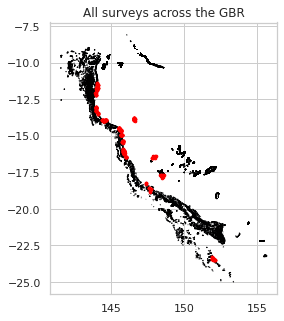

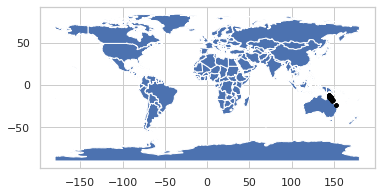

In [6]:
# Map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
Survey_AUS_end = Survey_AUS.copy()
# Data frame with start survey coordinates as geometric points 
gSurvey = gpd.GeoDataFrame(Survey_AUS, geometry = gpd.points_from_xy(Survey_AUS.lng_start, Survey_AUS.lat_start))

gSurvey_end = gpd.GeoDataFrame(Survey_AUS_end, geometry = gpd.points_from_xy(Survey_AUS.lng_end, Survey_AUS.lat_end))

# Map of GBR
shx = gpd.read_file("Data/shp_GBR/Reefs_GBR.shx")
ax = shx.plot(figsize=(15, 5), edgecolor='black')
ax.set_title("All surveys across the GBR")

# Plot the survey points on the GBR map
gSurvey.plot(ax = ax, color = 'red',markersize=7)

# Plot the survey points on the world map
ax_world = world.plot()
gSurvey.plot(ax = ax_world, color = 'black',markersize=7)

In [7]:
# Take the mean of the percentage cover for the whole dataframe 

mean_hard_coral = pf.mean_col(Survey_AUS, "pr_hard_coral")
mean_soft_coral = pf.mean_col(Survey_AUS, "pr_soft_coral")
mean_algae_coral = pf.mean_col(Survey_AUS, "pr_algae")
mean_oth_inv_coral = pf.mean_col(Survey_AUS, "pr_oth_invert")
mean_oth_coral = pf.mean_col(Survey_AUS, "pr_other")
mean_spec = pd.DataFrame({'Mean': [mean_hard_coral, mean_soft_coral, mean_algae_coral, mean_oth_inv_coral, mean_oth_coral]},index=["pr_hard_coral", "pr_soft_coral","pr_algae", "pr_oth_invert", "pr_other"])

### Plot the means as pie plot 

<AxesSubplot:ylabel='Mean'>

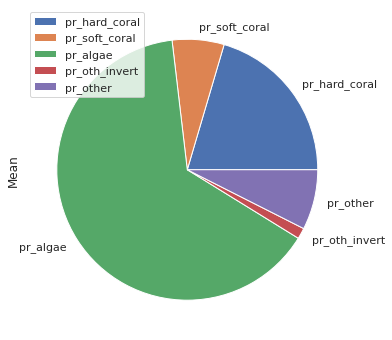

In [8]:
mean_spec.plot.pie(y = "Mean", figsize=(11, 6))

#### Number of surveys per year

In [9]:
Survey_AUS["surveydate"].dt.year.value_counts().reset_index()

,index,surveydate
0,2012,118
1,2016,60
2,2014,48
3,2017,35


We note that the number of surveys in 2012 were the highest, that is, the first year in which they conducted the study. 

In [10]:
# Split the data frames based on the years
Survey_2012, Survey_2014, Survey_2016, Survey_2017 = pf.split_years(Survey_AUS)

#### Make a Geodata-frame with the survey points

In [11]:
gSurvey_2012 = pf.make_geo_frame(Survey_2012)
gSurvey_2014 = pf.make_geo_frame(Survey_2014)
gSurvey_2016 = pf.make_geo_frame(Survey_2016)
gSurvey_2017 = pf.make_geo_frame(Survey_2017)

In [12]:
# Look if any transectid (square) has several surveys in it 
print("Survey_2012: = ",pf.trans_surv(gSurvey_2012)[0])
print("Survey_2014: = ",pf.trans_surv(gSurvey_2014)[0])
print("Survey_2016: = ",pf.trans_surv(gSurvey_2016)[0])
print("Survey_2017: = ",pf.trans_surv(gSurvey_2017)[0])

pf.trans_surv(gSurvey_2014)[1]

Survey_2012: =  0
Survey_2014: =  1
Survey_2016: =  0
Survey_2017: =  0


,surveyid,transectid,surveydate,ocean,country,folder_name,lat_start,lng_start,lat_end,lng_end,pr_hard_coral,pr_algae,pr_soft_coral,pr_oth_invert,pr_other,geometry,year
325,27002,12029,2014-05-09,PAC,AUS,PAC_AUS_27002_201405,-14.663358,145.664066,-14.663371,145.664061,0.1115,0.8079,0.0355,0.0228,0.0225,POINT (145.66407 -14.66336),2014
326,27003,12029,2014-05-09,PAC,AUS,PAC_AUS_27003_201405,-14.663525,145.663656,-14.663355,145.663741,0.0992,0.8270,0.0411,0.0129,0.0197,POINT (145.66366 -14.66352),2014


We see that only one survey from 2014 was taken in the same transectid, the rest are all independent 

In [13]:
# Let us look at the intersections between the different surveys; that is how many surveys are taken from same areas
df_2012 = pf.smart_df(gSurvey_2012, 2012)
df_2014 = pf.smart_df(gSurvey_2014, 2014)
df_2016 = pf.smart_df(gSurvey_2016, 2016)
df_2017 = pf.smart_df(gSurvey_2017, 2017)

In [14]:
# Outer join all data sets
df_joined = df_2012.join(df_2014, how = "outer").join(df_2016, how = "outer").join(df_2017, how = "outer")

# Fill the NaN values with "False"
df_joined.fillna(False, inplace = True)
# Sum on the trasectid (if 4 then all years have surveyed at this place)
df_joined["Sum"] = df_joined.sum(axis = 1)
df_joined.head()

,2012,2014,2016,2017,Sum
transectid,,,,,
10001,True,True,True,True,4
10002,True,True,True,True,4
10003,True,False,True,True,3
10004,True,False,False,False,1
10005,True,False,False,False,1


**Interpretation**

The dataframe above looks at each transect ID and identifies at which year they have been surveyed. The sum is out of 4 years (2012, 2014, 2016, 2017) and sums over how many years were surveyed

Text(0.5, 1.0, 'Number of transect ID (points) by survey occurences')

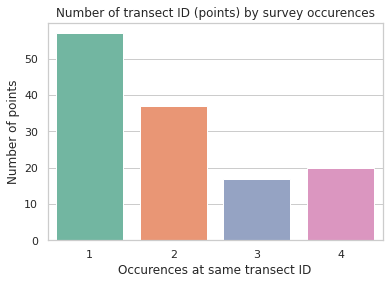

In [15]:
# plot occurences
ax = sns.countplot(x="Sum", data=df_joined, palette="Set2")
ax.set_ylabel('Number of points')
ax.set_xlabel('Occurences at same transect ID')
plt.title("Number of transect ID (points) by survey occurences")

Text(0.5, 0, 'Occurences')

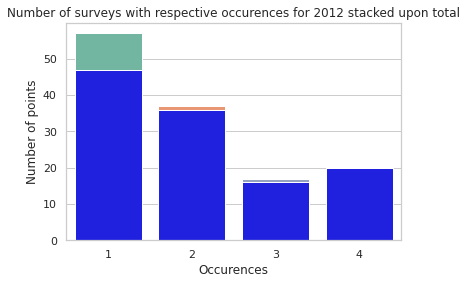

In [16]:
ax = sns.countplot(x="Sum", data=df_joined, palette="Set2")
ax.set_ylabel('Number of points')
ax.set_xlabel('Occurences at same transect ID')
# Let us replace the Boolean by the number of surveys which share a survey in the georaphic location
df_bool = df_joined.copy()
for i in range(4):
    df_joined.iloc[:,i] = df_joined.iloc[:,i]*df_joined['Sum']
df_joined_no_sum = df_joined.drop(columns = "Sum")   


ax = sns.countplot(x = 2012, data=df_joined_no_sum[-(df_joined_no_sum[2012] == 0)], color = "blue")
ax.set_title('Number of surveys with respective occurences for 2012 stacked upon total')
ax.set_ylabel('Number of points')
ax.set_xlabel('Occurences')

We note that only around:
- 20 points were taken at the 4 different years // (equivalent to 80 surveys)
- 17 at 3 years
- 35 at 2 years
- 55 only once --> This is bad news, but we know the 2012 had many more surveys than the other years so let us try and see how the years are distributed with occurences 


In black, it's the surveys from 2012, as we may see and unsurpinsgly so. It takes up most of the 1 and 2nd independent places. this is good news.


## Distribution of "species" with the years

In [17]:
# Mean per year 
Survey_mean = Survey_AUS.groupby(["year"], as_index = False).mean()
Survey_mean

,year,surveyid,transectid,lat_start,lng_start,lat_end,lng_end,pr_hard_coral,pr_algae,pr_soft_coral,pr_oth_invert,pr_other
0,2012,12743.610169,12743.610169,-15.343183,146.132773,-15.342325,146.129333,0.220435,0.589255,0.074544,0.012550,0.103204
1,2014,32888.583333,14995.520833,-14.618066,145.743920,-14.617398,145.742180,0.219944,0.662515,0.058858,0.012617,0.046056
2,2016,44289.000000,16833.133333,-16.285364,146.371320,-16.283135,146.371235,0.188382,0.683850,0.052745,0.015107,0.059905
3,2017,47018.000000,13418.000000,-14.301355,145.098854,-14.298800,145.098036,0.156740,0.729780,0.056637,0.015174,0.041597


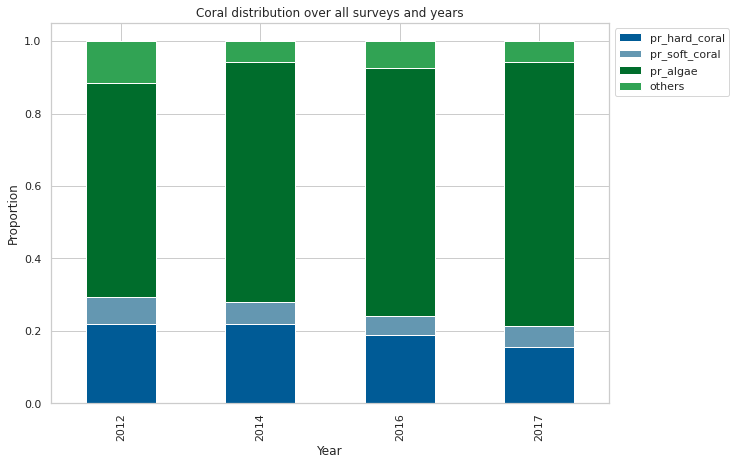

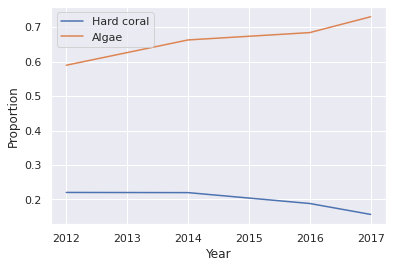

In [18]:
# Plot for mean 
pf.plot_mean_stack(Survey_mean, "Coral distribution over all surveys and years")
pf.hard_algae_plot(Survey_mean)

Let us now plot the mean for regions that were sampled several times throughout the years

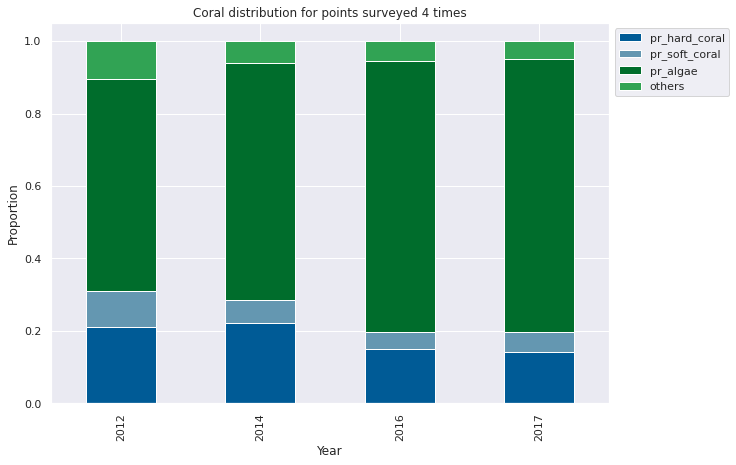

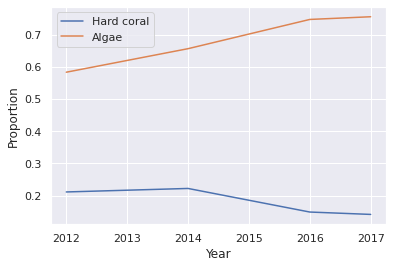

In [19]:
# Extract and bar plot areas that were surveyed 4 times 
df_4_region = pf.mean_region(Survey_AUS, df_joined, 4)
df_4 = df_4_region.groupby("year").mean()
pf.plot_mean_stack(df_4.reset_index(), "Coral distribution for points surveyed 4 times")
pf.hard_algae_plot(df_4)

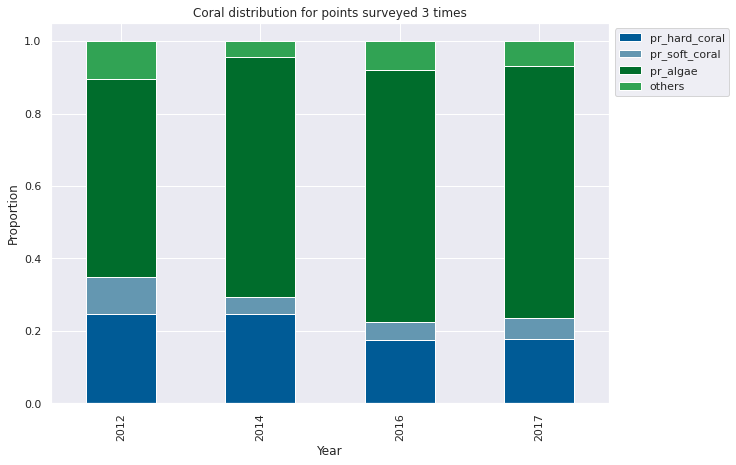

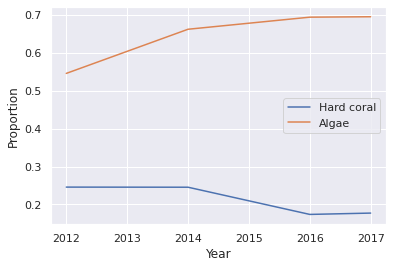

In [20]:
# Extract and bar plot areas that were surveyed 3 times 
df_3_region = pf.mean_region(Survey_AUS, df_joined, 3)
df_3 = df_3_region.groupby("year").mean()
pf.plot_mean_stack(df_3.reset_index(), "Coral distribution for points surveyed 3 times")
pf.hard_algae_plot(df_3)

**Notes**
- For surveys which were surveyed three and four times; the trend is a decrease in hard/soft coral cover and an increase of algae and others

## More insighful
It might be more insightful to look at the distribution of corals but within similar regions 



In [21]:
df_4_region = pf.make_geo_frame(df_4_region)
df_3_region = pf.make_geo_frame(df_3_region)


### Where are the corals 



<AxesSubplot:title={'center':'Continous survey locations for 4 years'}>

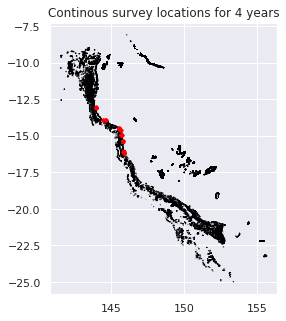

In [22]:
shx = gpd.read_file("Data/shp_GBR/Reefs_GBR.shx")
ax = shx.plot(figsize=(15, 5), edgecolor='black')
ax.set_title("Continous survey locations for 4 years")

# Plot the survey points on the GBR map
df_4_region.plot("pr_hard_coral", ax = ax,color = "red",markersize=7)


<AxesSubplot:title={'center':'Continous survey locations for 3 years'}>

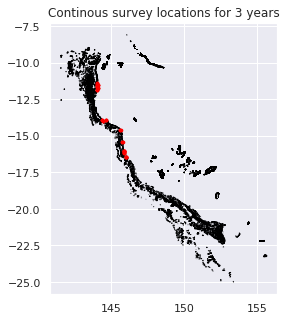

In [23]:

ax = shx.plot(figsize=(15, 5), edgecolor='black')
ax.set_title("Continous survey locations for 3 years")

df_3_region.plot("pr_hard_coral", ax = ax,color = "red",markersize=7)

## Difference between 2012 and 2017 
Now we are interested in how the proportions changed for surveys located in the same point for 2012 and 2017
Steps:
- Extract the transects id where surveys were done in both 2017 and 2012
- You find 34 points 
- Take the difference between the two in columns of hard corals and algae 

In [24]:
# retrieve transect id where you have surveys and for 2012 and for 2017
list_12_17 = df_bool.index[(df_bool[2012] == True) & (df_bool[2017] == True)].tolist()
print("You have ",len(list_12_17), " points where one survey was done in 2012 and another in 2017")

You have  34  points where one survey was done in 2012 and another in 2017


In [25]:
df_12 = pf.fun(gSurvey_2012,list_12_17)
df_17 = pf.fun(gSurvey_2017,list_12_17)

In [26]:
# Add the difference of hard coral and algae between 2017 qnd 2012 to dataframe 
# Add zero line
pf.group_others(df_17)
pf.group_others(df_12)

# Add others 
df_17["diff_hard"] = df_17["pr_hard_coral"] - df_12["pr_hard_coral"]
df_17["diff_algae"] = df_17["pr_algae"] - df_12["pr_algae"]
df_17["diff_others"] = df_17["others"] - df_12["others"]

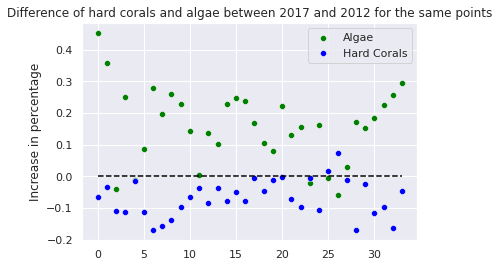

In [27]:
sns.scatterplot(y = df_17["diff_algae"], x = range(34),color="Green", label = "Algae")

ax = sns.scatterplot(y = df_17["diff_hard"], x = range(34), color = "Blue", label = "Hard Corals")
#ax = sns.scatterplot(y = df_17["diff_others"], x = range(34), color = "Red", label = "Others")
ax.set( xlabel = "", ylabel='Increase in percentage')
ax.set_title("Difference of hard corals and algae between 2017 and 2012 for the same points")
plt.plot(range(34), np.zeros(34),'--', color = "black")
plt.show()



## Spatial distribution of differences 
Next Goal: look at spatial distribution of regions depending on their difference of hard corals between 2012 and 2017, to note if some regions are more prone to decay than others



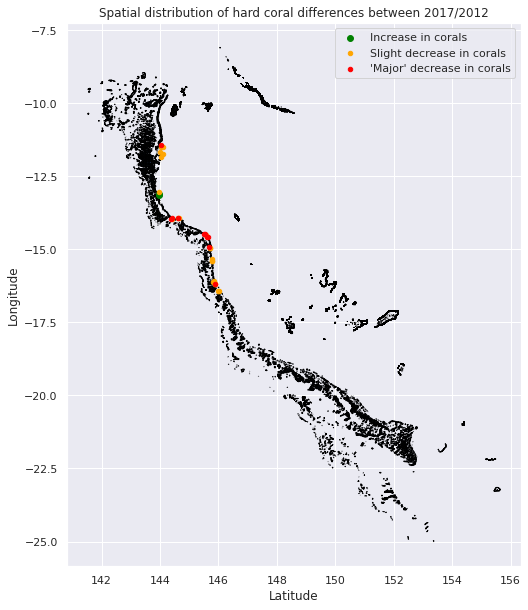

In [28]:

ax = shx.plot(figsize=(20, 10), edgecolor='black')

df_cor_increase = df_17[df_17["diff_hard"] >= 0]
df_cor_increase.plot(ax = ax, color = "green", markersize = 35, label = "Increase in corals")

df_minor_decrease = df_17[(df_17["diff_hard"] < 0) & (df_17["diff_hard"] > -0.1)]
df_minor_decrease.plot(ax =ax, color = "orange", markersize = 20, label = "Slight decrease in corals")

df_major_decrease = df_17[(df_17["diff_hard"] <= -0.1)]
df_major_decrease.plot(ax = ax, color = "red", markersize = 20, label = "'Major' decrease in corals")

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Spatial distribution of hard coral differences between 2017/2012")
ax.legend();

### Nest step: Make a bar plot by bining the differences by latitudes

In [29]:
df_lat = df_17.copy()
if ('lat'not in df_lat.columns):
    df_lat["lat"] = df_17["geometry"].y
    
df_lat["increase"] = df_lat["diff_hard"] >= 0
df_lat["slight_decrease"] = (df_17["diff_hard"] < 0) & (df_17["diff_hard"] > -0.1)
df_lat["major_decrease"] = (df_17["diff_hard"] <= -0.1)
df_lat.head()

,pr_hard_coral,pr_soft_coral,pr_algae,pr_oth_invert,pr_other,geometry,year,others,diff_hard,diff_algae,diff_others,lat,increase,slight_decrease,major_decrease
transectid,,,,,,,,,,,,,,,
10001,0.1192,0.0437,0.8253,0.0081,0.0037,POINT (145.89493 -16.19389),2017,0.0118,-0.0664,0.4529,-0.1592,-16.193885,False,True,False
10002,0.1038,0.0380,0.8329,0.0073,0.0179,POINT (145.89815 -16.18885),2017,0.0252,-0.0326,0.3563,-0.0539,-16.188854,False,True,False
10003,0.1385,0.0324,0.5264,0.0058,0.2968,POINT (145.89116 -16.17526),2017,0.3026,-0.1090,-0.0389,0.1902,-16.175264,False,False,True
12005,0.0591,0.0187,0.7207,0.0067,0.1945,POINT (145.61609 -14.57076),2017,0.2012,-0.1126,0.2504,-0.1470,-14.570760,False,False,True
12025,0.1717,0.0535,0.7665,0.0079,0.0001,POINT (145.56221 -14.50807),2017,0.0080,-0.0144,-0.0126,-0.0022,-14.508070,False,True,False


Text(0.5, 1.0, 'Change in corals between 2017-2012 based on latitude')

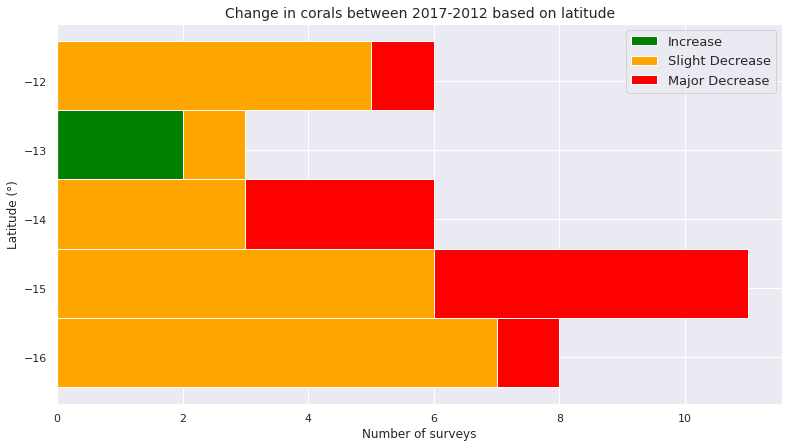

In [30]:

fig = plt.figure(figsize = (13,7))

h1 = fig.add_subplot()

bins = 5

h1.hist([df_lat[df_lat["increase"]]["lat"],df_lat[df_lat["slight_decrease"]]["lat"],df_lat[df_lat["major_decrease"]]["lat"]], bins=bins, stacked=True, orientation = "horizontal"\
       ,color = ("green", "orange", "red"));
plt.legend(["Increase", "Slight Decrease", "Major Decrease"], fontsize = 13)
plt.ylabel("Latitude (°)")
plt.xlabel("Number of surveys")
plt.title("Change in corals between 2017-2012 based on latitude", fontsize = 14)


**Labels**
Below -0.1 (“big” decrease in hard corals): Red dots
Between -0.1 and 0 (“medium decrease in hard corals”): Orange
Above 0 (“increase” in hard corals): Green dots

**Outcome**: We have an area of increase and medium decrease in the center of the zoomed mapped. A medium decrease in the North and some areas of more pronounced decrease in the South. What factors influence this ? → Will hopefully know using the anthropological and environemntal factors

**Next**: Do the same with the algae and then try to see what happens when you group by region instead

### Same steps with Algae instead of hard corals

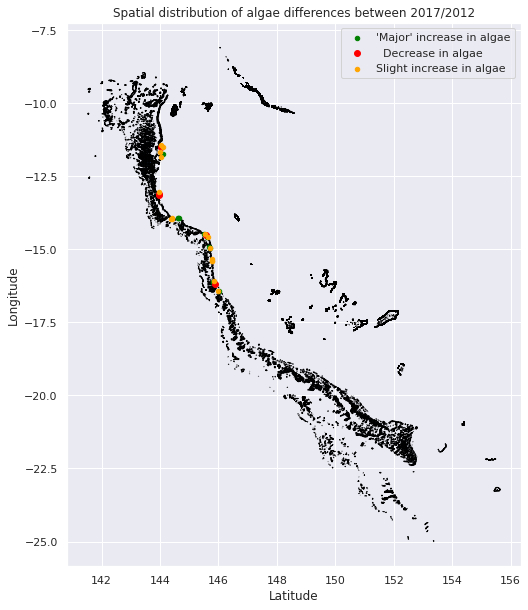

In [31]:
shx = gpd.read_file("Data/shp_GBR/Reefs_GBR.shx")
ax = shx.plot(figsize=(20, 10), edgecolor='black')


df_17[df_17["diff_algae"] >= 0.2].plot(ax = ax, color = "green", markersize = 20, label = "'Major' increase in algae")
df_17[(df_17["diff_algae"] <= 0)].plot(ax = ax, color = "red", markersize = 35, label = "  Decrease in algae")
df_17[(df_17["diff_algae"] > 0) & (df_17["diff_algae"] < 0.2)].plot(ax =ax, color = "orange", markersize = 20, label = "Slight increase in algae")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Spatial distribution of algae differences between 2017/2012")
ax.legend()


In [32]:
df_lat["maj_increase_al"] = df_17["diff_algae"] >= 0.2
df_lat["slight_increase_al"] = (df_17["diff_algae"] > 0) & (df_17["diff_algae"] < 0.2)
df_lat["decrease_al"] = (df_17["diff_algae"] <= 0)

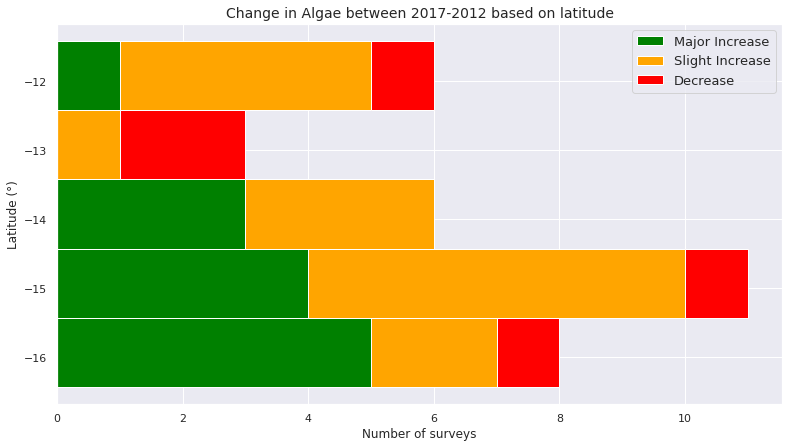

In [33]:
fig = plt.figure(figsize = (13,7))

h1 = fig.add_subplot()

bins = 5

h1.hist([df_lat[df_lat["maj_increase_al"]]["lat"],df_lat[df_lat["slight_increase_al"]]["lat"],df_lat[df_lat["decrease_al"]]["lat"]], bins=bins, stacked=True, orientation = "horizontal"\
       ,color = ("green", "orange", "red"));
plt.legend(["Major Increase", "Slight Increase", "Decrease"], fontsize = 13);
plt.ylabel("Latitude (°)")
plt.xlabel("Number of surveys")
plt.title("Change in Algae between 2017-2012 based on latitude", fontsize = 14);

**Labels**
- Above 0.2 (“big” increase in algae): Green dots
- Between 0 and 0.2 (“medium increase in algae”): Orange
 -below 0 (Decrease in algae): Red dots


## Next step: separation between North and South
Looking at the last graph ("Change in Algae between 2017-2012 based on latitude") it would be interesting to separate North and South at a latitude of about -13.5°. It seems as if we have a significant difference there const lat = -13.5



In [34]:
# Separation latitude
lat_separator = -13.5

# Make geo dataframe 
Survey_geo = pf.make_geo_frame(Survey_AUS)

# Make new latitude column 
Survey_geo["lat"] = Survey_geo.geometry.y

# Separate the data between above the chosen
Survey_mean_North = Survey_geo[Survey_geo["lat"] >= lat_separator].groupby(["year"], as_index = False).mean()
Survey_mean_South = Survey_geo[Survey_geo["lat"] < lat_separator].groupby(["year"], as_index = False).mean()

Survey_mean_North.set_index("year", inplace = True)
Survey_mean_South.set_index("year", inplace = True)

Survey_mean_North["others"] = Survey_mean_North["pr_oth_invert"] + Survey_mean_North["pr_other"]
Survey_mean_South["others"] = Survey_mean_South["pr_oth_invert"] + Survey_mean_South["pr_other"]

Survey_mean_North.drop(columns = ['surveyid', 'transectid', 'lat_start', 'lng_start', 'lat_end',
       'lng_end', 'lat', "pr_oth_invert", "pr_other"], inplace = True)

Survey_mean_South.drop(columns = ['surveyid', 'transectid', 'lat_start', 'lng_start', 'lat_end',
       'lng_end', 'lat',"pr_oth_invert", "pr_other"], inplace = True)

# Keep columns of interest
cols = ['pr_hard_coral',  'pr_soft_coral', 'pr_algae','others']

Survey_mean_South = Survey_mean_South[cols]
Survey_mean_North = Survey_mean_North[cols]

<AxesSubplot:title={'center':'North and South Coral distribution for all Surveys'}, xlabel='year'>

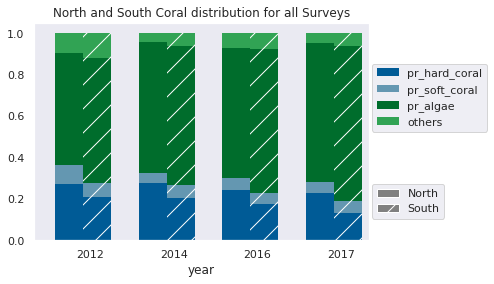

In [35]:
# Plot the 
pf.plot_clustered_stacked([Survey_mean_North, Survey_mean_South],["North", "South"])